# Import Tools 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg    
import seaborn as sns

# Deep Learning Tools
from tensorflow.keras import layers, models
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical


# Machine Learning Tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


# Data Loading 

In [3]:
import os
import cv2
from tqdm import tqdm

# Base path to the 'covid_data' folder
base_path = './covid_data'

# Collect image paths
imagePaths = []
for dirname, _, filenames in os.walk(base_path):
    # Only process files inside the 'images' folders
    if 'images' in dirname:  # Ensures the folder name contains 'images'
        for filename in filenames:
            if filename.endswith('.png'):  # Consider only PNG files
                imagePaths.append(os.path.join(dirname, filename))

# Display some collected paths for verification
print(f"Total images found: {len(imagePaths)}")
print("Sample paths:", imagePaths[:5])


Total images found: 15153
Sample paths: ['./covid_data\\COVID\\images\\COVID-1.png', './covid_data\\COVID\\images\\COVID-10.png', './covid_data\\COVID\\images\\COVID-100.png', './covid_data\\COVID\\images\\COVID-1000.png', './covid_data\\COVID\\images\\COVID-1001.png']


# Image Preprocessing

In [4]:
# Data - Label
Data = []
Target = []
resize = 150

# Label mapping dictionary
cat = {'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19'}

# Iterate through the image paths and assign the labels
for imagePath in tqdm(imagePaths):
    label = imagePath.split(os.path.sep)[-3]  # Extract the label from parent folder (2 levels up from image)
    
    if label not in cat:
        continue  # Skip this image if label is not found in dictionary
    
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (resize, resize)) / 255.0  # Normalize image pixels to [0, 1]

    Data.append(image)
    Target.append(cat[label])

print(f"Processed {len(Data)} images with corresponding labels.")

100%|████████████████████████████████████████████████████████████████████████████| 15153/15153 [03:42<00:00, 68.13it/s]

Processed 15153 images with corresponding labels.


In [ ]:
#Resizing Images and Preparing Data

In [5]:
print(len(Data))
print(len(Target))

15153
15153


In [16]:
Target[4400:4410]

['Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal']

# Label Encoding and to one hot encoding


# examples
[[0., 1., 0.],  # 'Normal' -> [0, 1, 0]

 [0., 0., 1.],  # 'Pneumonia' -> [0, 0, 1]
 
 [1., 0., 0.]]  # 'Covid-19' -> [1, 0, 0]

In [18]:
# encode labels as integers

le = LabelEncoder()
labels = le.fit_transform(Target)
labels = to_categorical(labels) #Converts integer-encoded labels into one-hot encoded vectors. 
                                #A one-hot vector is an array with 1 at the index of the class and 0 elsewhere.

print(le.classes_)
print(labels[0])

['Covid-19' 'Normal' 'Pneumonia']
[1. 0. 0.]


# Splitting Dataset

In [4]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parameters
resize = 100  # Resize images to 100x100

# Data and Labels
Data = []
Target = []

# Label mapping
cat = {'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19'}

# Load images and labels
base_path = './covid_data'
for dirname, _, filenames in os.walk(base_path):
    if 'images' in dirname:
        for filename in tqdm(filenames):
            if filename.endswith('.png'):
                label = dirname.split(os.path.sep)[-2]  # Parent folder name
                if label not in cat:
                    continue
                image = cv2.imread(os.path.join(dirname, filename))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (resize, resize)) / 255.0  # Normalize
                Data.append(image)
                Target.append(cat[label])

# Convert to numpy arrays
Data = np.array(Data, dtype=np.float32)
Target = np.array(Target)

# Encode labels and convert to one-hot encoding
le = LabelEncoder()
labels = le.fit_transform(Target)
labels = to_categorical(labels)




100%|███████████████████████████████████████████████████████████████████████████████████████████| 1345/1345 [00:16<00:00, 79.16it/s]


In [6]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(Data, labels, test_size=0.20, stratify=labels, random_state=42)

# Train-validation split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, stratify=y_train, random_state=42)

print("Training data shape:", x_train.shape)
print("Validation data shape:", x_val.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (9697, 100, 100, 3)
Validation data shape: (2425, 100, 100, 3)
Testing data shape: (3031, 100, 100, 3)


# CNN Model Training

In [10]:

# Define the model
s = 100  # Size

model = Sequential()


# Feature Extraction Parts
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(s, s, 3), kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Dropout(0.25))


# ann = dense layers

# Nueral Network (Dense Layers)
model.add(Flatten())  # flatten the data , convert fro 2d array to 1d array
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))



# Compile the model
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

# Train the model with validation data
epochs = 25
history = model.fit(x_train, y_train, epochs=epochs, batch_size=40, verbose=1, validation_data=(x_val, y_val))

Epoch 1/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 62s 238ms/step - accuracy: 0.7031 - loss: 0.7477 - val_accuracy: 0.8726 - val_loss: 0.3445
Epoch 2/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 55s 227ms/step - accuracy: 0.8638 - loss: 0.3307 - val_accuracy: 0.9076 - val_loss: 0.2424
Epoch 3/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 54s 221ms/step - accuracy: 0.9069 - loss: 0.2344 - val_accuracy: 0.9233 - val_loss: 0.2119
Epoch 4/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 55s 226ms/step - accuracy: 0.9171 - loss: 0.2161 - val_accuracy: 0.9105 - val_loss: 0.2466
Epoch 5/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 60s 245ms/step - accuracy: 0.9275 - loss: 0.1937 - val_accuracy: 0.9348 - val_loss: 0.1758
Epoch 6/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 54s 222ms/step - accuracy: 0.9419 - loss: 0.1529 - val_accuracy: 0.9381 - val_loss: 0.1713
Epoch 7/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 53s 216ms/step - accuracy: 0.9479 - loss: 0.1367 - val_accuracy: 0.9443 - val_loss: 0.1763
Epoch 8/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 53s 216ms/step - accuracy: 0.9588 - loss: 0

# Extract accuracy and loss from the history object

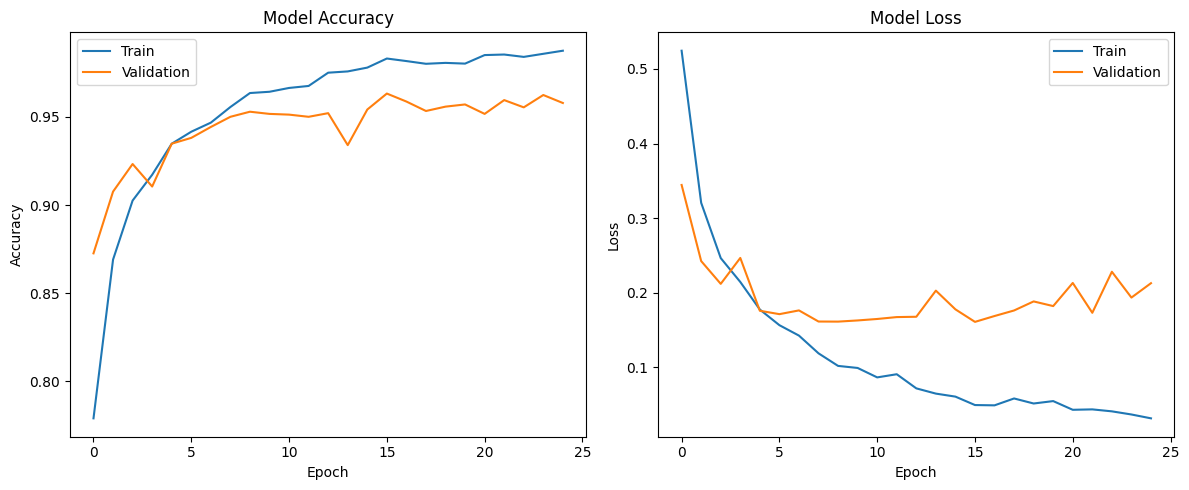

In [13]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

# Plotting Confusion Matrix

In [15]:
# Make predictions
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)  # Convert predictions to class labels

# Convert testY from one-hot encoded to class labels (integers)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

print(cm)

95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step
[[ 670   50    3]
 [  35 1980   24]
 [   3   10  256]]


In [17]:
class_names = le.classes_

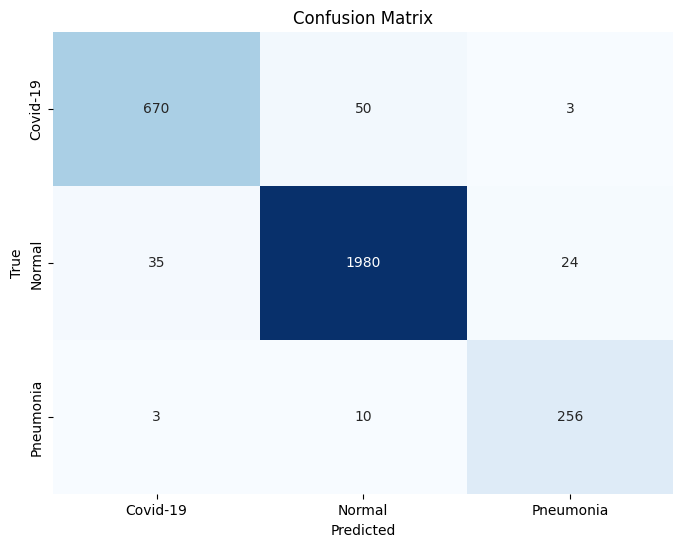

In [19]:
# Create DataFrame for the confusion matrix
Confusion_Matrix = pd.DataFrame(cm, index=class_names, columns=class_names)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Confusion_Matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# classification report on test

In [20]:
# predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(y_true, y_pred, target_names=le.classes_, digits = 5))

              precision    recall  f1-score   support

    Covid-19    0.94633   0.92669   0.93641       723
      Normal    0.97059   0.97106   0.97083      2039
   Pneumonia    0.90459   0.95167   0.92754       269

    accuracy                        0.95876      3031
   macro avg    0.94050   0.94981   0.94492      3031
weighted avg    0.95894   0.95876   0.95877      3031



# Save Model and Label Encoder

In [21]:
model.save('CNN_Covid19_Xray_Version.h5') 


import pickle

pickle.dump(le, open("Label_encoder.pkl",'wb'))
print("saved")

saved


# Load for inference

In [25]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('CNN_Covid19_Xray_Version.h5')

le = pickle.load(open("Label_encoder.pkl",'rb'))

# Real Time Detection System

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detection_system(image_path, model, label_encoder, image_size=100):
    """
    Detection system function to classify an input image.

    Parameters:
    - image_path: The path to the image to classify.
    - model: The trained Keras model.
    - label_encoder: The LabelEncoder used to encode the labels.
    - image_size: The target size for resizing the image (default: 150x150).
    
    Returns:
    - predicted_label: The predicted class label.
    - confidence_score: The confidence score of the predicted class.
    """
    # Load the image from the provided path
    image = cv2.imread(image_path)
    
    if image is None:
        raise ValueError(f"Image not found at path: {image_path}")
    
    # Convert image from BGR to RGB format
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Resize the image to the same size as the training images
    image_resized = cv2.resize(image_rgb, (image_size, image_size))
    
    # Normalize the pixel values to the range [0, 1]
    image_normalized = image_resized / 255.0
    
    # Expand the dimensions to match the input shape for the model
    image_input = np.expand_dims(image_normalized, axis=0)
    
    # Predict the class of the image
    predictions = model.predict(image_input)
    
    # Get the predicted class index and confidence score
    predicted_index = np.argmax(predictions)
    confidence_score = predictions[0][predicted_index]
    
    # Decode the predicted index back to the original label
    predicted_label = label_encoder.inverse_transform([predicted_index])[0]
    
    
    # Display the image with the predicted label and confidence score
    plt.imshow(image_resized)
    plt.title(f"Predicted: {predicted_label}, Confidence: {confidence_score*100:.2f}%")
    plt.axis('off')
    plt.show()

    return predicted_label, confidence_score



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


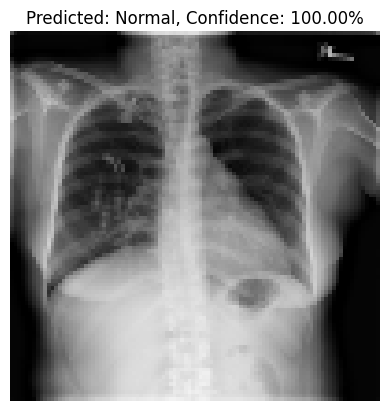

Predicted Label: Normal, Confidence Score: 100.00%


In [34]:
# Example usage
image_path ="./covid_data/Normal/images/Normal-1991.png"
predicted_label, confidence_score = detection_system(image_path, model, le)
print(f"Predicted Label: {predicted_label}, Confidence Score: {confidence_score*100:.2f}%")
